# Importing and Managing Financial Data in Python

#### Import the necessary libraries

In [11]:
import basic.basic_functions as bf #custom functions library
import pandas as pd #data analysis library
import numpy as np #numerical library
from pandas_datareader.data import DataReader  #data reader library
from datetime import date #date library
from pathlib import Path #path library
import os  #operating system library

import matplotlib.pyplot as plt #plotting library
import plotly.graph_objects as go #plotly library
import plotly.express as px #plotly express library

#### Set the directory

In [12]:
base_folder, data, archive, output = bf.set_folders()

Not Running on Colab
Base Folder is C:\Users\abdul\OneDrive\Documents\MSBA
Data Folder is C:\Users\abdul\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\abdul\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\abdul\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/abdul/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\abdul\OneDrive\Documents\MSBA\notebooks\Financial_analysis


## Downloading data

### Getting Stock Data

In [13]:
IEX_API_KEY = os.getenv('IEX_API_KEY')

In [14]:
# Set the start and end date
start = date(2022, 1, 1)
end = date.today()
ticker = 'AAPL'
data_source = 'iex'
# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)
# Display and inspect the result
print(stock_prices.head(),'\n')
stock_prices.info()

              open    high     low   close     volume
date                                                 
2022-01-03  177.83  182.88  177.71  182.01  104701220
2022-01-04  182.63  182.94  179.12  179.70   99310438
2022-01-05  179.61  180.17  174.64  174.92   94537602
2022-01-06  172.70  175.30  171.64  172.00   96903955
2022-01-07  172.89  174.14  171.03  172.17   86709147 

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 2022-01-03 to 2023-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    308 non-null    float64
 1   high    308 non-null    float64
 2   low     308 non-null    float64
 3   close   308 non-null    float64
 4   volume  308 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 14.4+ KB


### Getting Economic Data

We can use the fred module to get data from the Federal Reserve Economic Data (FRED) database. The FRED database is a repository of economic data from the Federal Reserve Bank of St. Louis. The fred module is part of the pandas-datareader package.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 662 entries, 1968-01-01 to 2023-02-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTISPLC  662 non-null    float64
dtypes: float64(1)
memory usage: 10.3 KB


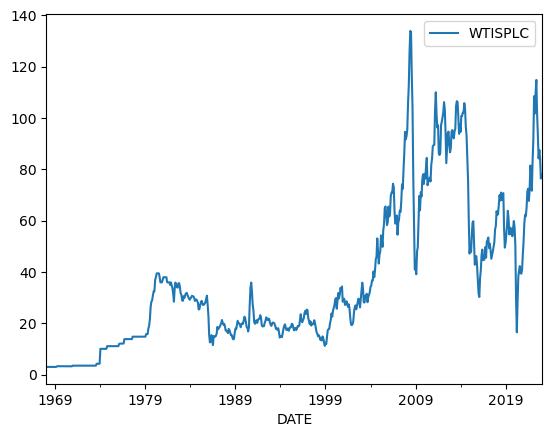

In [20]:
# Getting data for oil prices
# Set start date
start = date(1968, 1, 1)

# Set series code
series = 'WTISPLC'

# Import the data
oil_price = DataReader(series, 'fred', start=start)

# Inspect the price of oil
oil_price.info()

# Plot the price of oil
oil_price.plot()
plt.show()

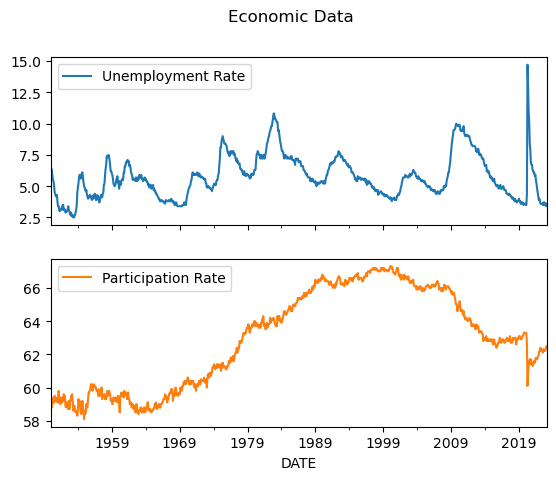

In [19]:
# Set the start date
start = date(1950, 1,1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', "Participation Rate"]

# Plot the data
econ_data.plot(subplots=True, title='Economic Data')
plt.show()

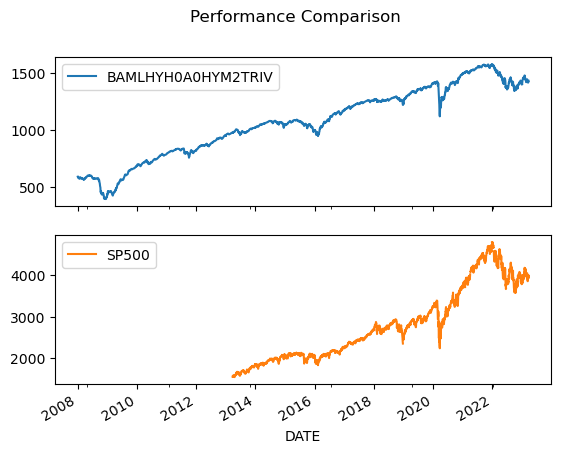

In [21]:
# Set the start date
start = date(2008,1,1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
performance = DataReader(series, 'fred', start)

# Plot the results
performance.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

#### Some useful code